# INTRODUCTION

This car analysis and visualization can help car buyers with thier decisions. 
- With this data I want to examine which manufacturer has the the highest sales and highest and lowest prices and find the relationship between them to help car buyers and manufacturers.
- This dataset is from kaggle (http://kaggle.)https://www.kaggle.com/datasets/gagandeep16/car-sales


In [3]:
import pandas as pd
import numpy as np
import plotly.io as pio # additional lib 
import plotly.express as px
import plotly.offline as py
import seaborn as sd # additional lib 
import matplotlib.pyplot as plt 


# Top 5 Manufacturer Sales 
Here I am importing the csv file to process the data. After importing the csv file I am dropping any rows with 'NA' values.
After getting rid of those values I am going to group the car data by manufacturer and sort the values in decending order to get the top selling manufacturer. Finding this information can show which manufacturers are the most popular.

In [4]:
carData = pd.read_csv('Car_sales.csv')
carData.dropna(subset=["Price_in_thousands"], inplace= True)
carData
cdg = carData.groupby('Manufacturer').sum('Sales_in_thousands').sort_values('Sales_in_thousands', ascending = False)

cdg.head()

 

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Manufacturer,,,,,,,,,,,,
Ford,2022.635,129.600,231.520,36.6,1871.0,1239.7,801.3,2148.3,38.052,209.7,251.0,760.611125
Dodge,910.149,168.505,266.350,40.8,2195.0,1261.4,821.8,2151.1,39.865,237.4,201.0,889.738749
Toyota,740.205,133.260,197.846,23.6,1446.0,941.6,626.3,1636.7,28.822,159.9,227.0,593.913327
Honda,592.674,77.785,101.385,12.6,802.0,537.8,352.3,920.9,16.635,85.4,125.0,326.056804
Chevrolet,554.365,105.845,180.205,27.5,1540.0,935.4,632.5,1666.7,26.789,139.3,256.0,621.371764


# Top 5 Most Expensive Car Models
I am finding the top 5 most expensive car model by sorting values based on Price_in_thousands since all the models are already grouped. 

In [5]:
pList = ['Model','Manufacturer', 'Price_in_thousands','Sales_in_thousands']
pdg = carData.sort_values('Price_in_thousands', ascending = False)
pdg = pdg[pList]
pdg.head()

,Model,Manufacturer,Price_in_thousands,Sales_in_thousands
99,CL500,Mercedes-B,85.500,0.954
95,SL-Class,Mercedes-B,82.600,3.311
126,Carrera Cabrio,Porsche,74.970,1.866
125,Carrera Coupe,Porsche,71.020,1.280
39,Viper,Dodge,69.725,0.916


# Most Fuel Efficient Models


,Model,Fuel_efficiency,Manufacturer,Price_in_thousands,Sales_in_thousands
26,Metro,45.0,Chevrolet,9.235,21.855
136,Corolla,33.0,Toyota,13.108,142.535
130,SC,33.0,Saturn,12.535,24.546
129,SL,33.0,Saturn,10.685,80.620
25,Prizm,33.0,Chevrolet,13.960,32.299


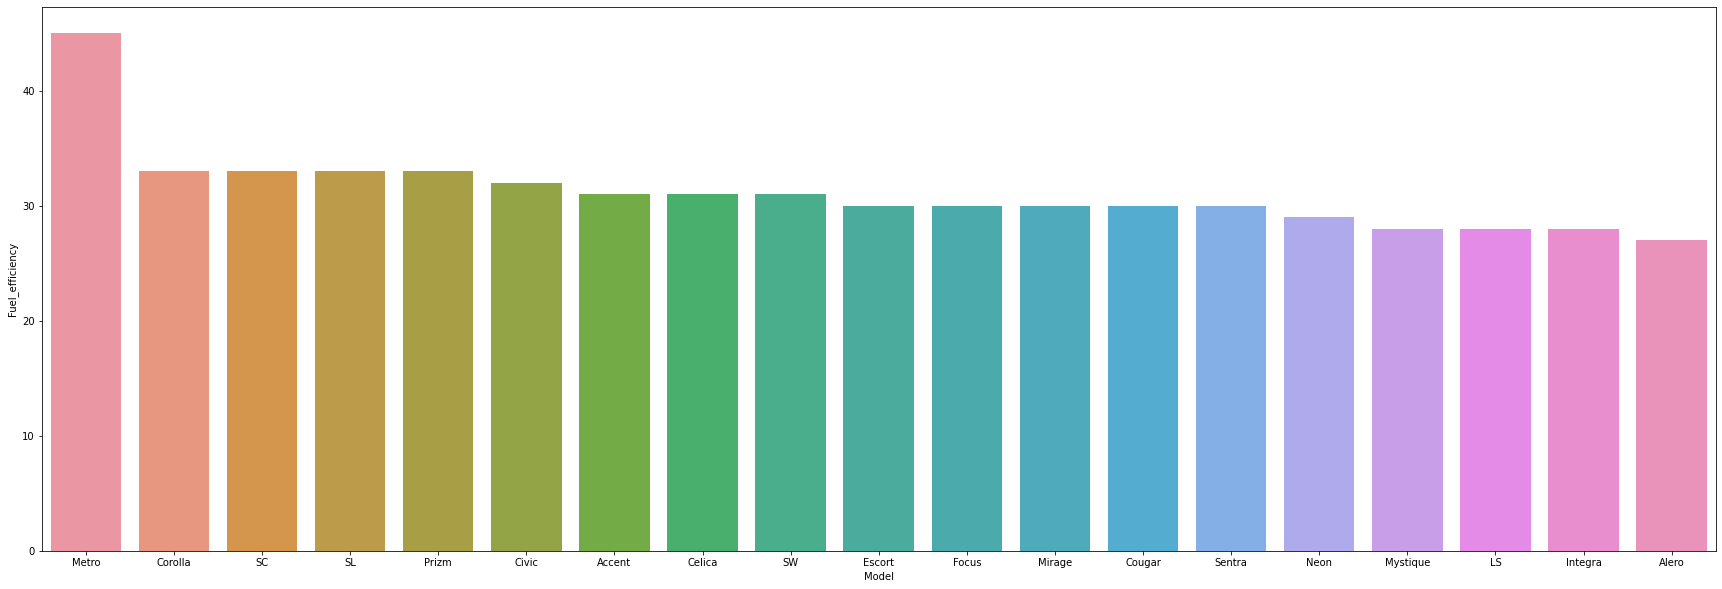

In [20]:
fdgList = ['Model','Fuel_efficiency','Manufacturer', 'Price_in_thousands','Sales_in_thousands']
fdg = carData.sort_values('Fuel_efficiency', ascending = False)
fdg = fdg[fdgList]


fig, ax = plt.subplots(figsize=(30,10))
sd.barplot( x='Model', y='Fuel_efficiency', data = fdg.head(20) )
fdg.head()

# Most Powerful Models 

,Model,Horsepower,Fuel_efficiency,Manufacturer,Price_in_thousands,Sales_in_thousands
39,Viper,450.0,16.0,Dodge,69.725,0.916
24,Corvette,345.0,22.0,Chevrolet,45.705,17.947
6,A8,310.0,21.0,Audi,62.000,1.380
99,CL500,302.0,20.0,Mercedes-B,85.500,0.954
95,SL-Class,302.0,20.0,Mercedes-B,82.600,3.311


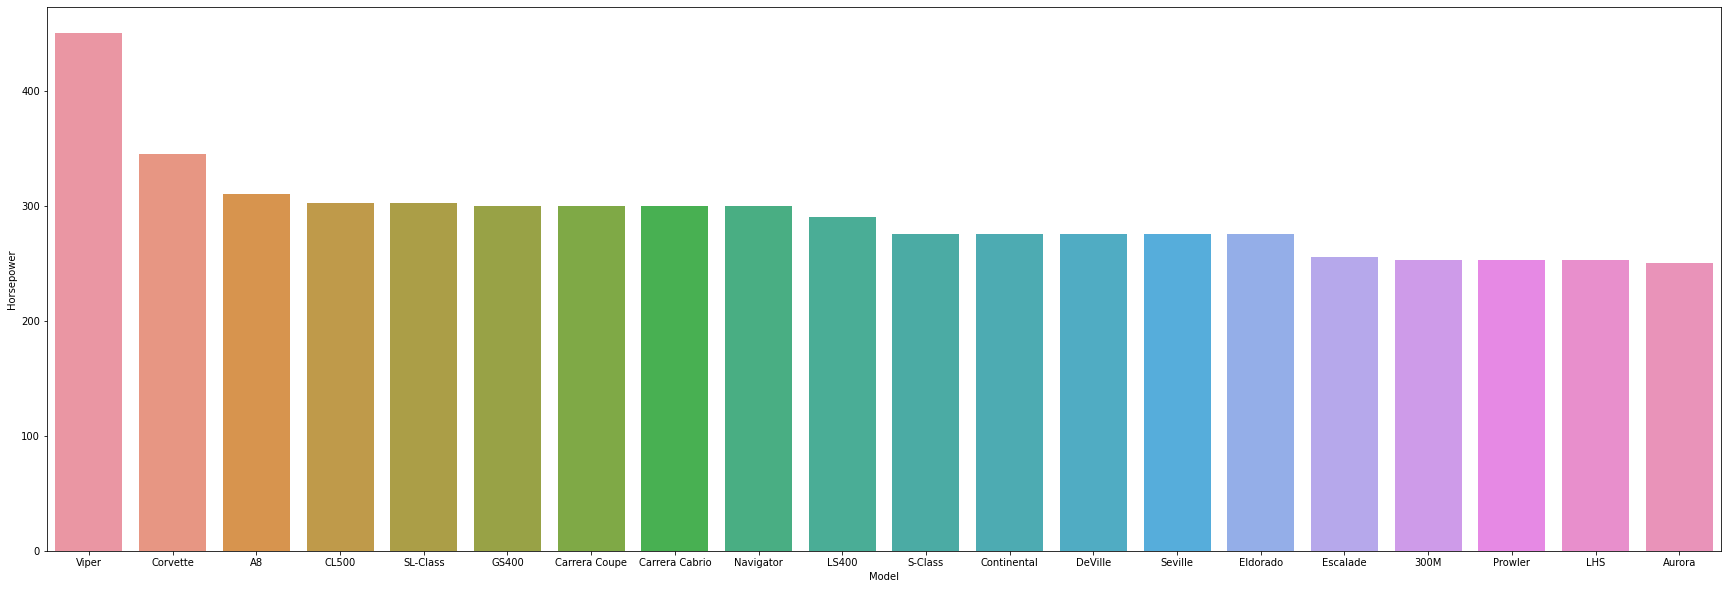

In [23]:
podgList = ['Model','Horsepower','Fuel_efficiency','Manufacturer', 'Price_in_thousands','Sales_in_thousands']
podg = carData.sort_values('Horsepower', ascending = False)
podg = podg[podgList]


fig, ax = plt.subplots(figsize=(30,10))
sd.barplot( x='Model', y='Horsepower', data = podg.head(20) )
podg.head()

# Fuel Econ vs Horsepwer

In [35]:
fig = px.scatter(carData, x="Fuel_efficiency", y="Horsepower", color="Model")
fig.show()

# Top 5 Expensive Priced Manufacturer's (Average Vehicle Price)

In [21]:
x = ['Manufacturer', 'Price_in_thousands','Sales_in_thousands']
avg = carData.groupby('Manufacturer').mean('Price_in_thousands').sort_values('Price_in_thousands', ascending = False).reset_index(col_level = 1)

avg.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Porsche,4.042667,56.475000,62.473333,3.166667,272.333333,93.466667,69.700000,173.333333,2.961667,17.000000,22.000000,121.247672
1,Mercedes-B,13.013889,44.118750,52.916667,3.422222,232.222222,106.377778,70.111111,179.966667,3.675111,18.922222,23.444444,103.440586
2,Lexus,17.807167,33.141667,44.055000,3.616667,245.833333,108.816667,72.033333,189.650000,3.982500,20.533333,20.833333,104.887005
3,Jaguar,15.467000,NaN,42.800000,3.000000,240.000000,114.500000,71.600000,191.300000,3.650000,18.400000,21.000000,102.178985
4,Lincoln,28.544667,21.125000,41.690000,4.866667,263.333333,115.233333,77.233333,209.533333,4.460667,23.000000,19.333333,110.490057


# Top 5 Cheapest Priced Manufacturer's (Average Vehicle Price)

In [7]:
avg.tail()

,Manufacturer,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
25,Honda,118.534800,15.557000,20.277000,2.520000,160.400000,107.560000,70.460000,184.180000,3.327000,17.080000,25.000000,65.211361
26,Chevrolet,61.596111,13.230625,20.022778,3.055556,171.111111,103.933333,70.277778,185.188889,2.976556,15.477778,28.444444,69.041307
27,Volkswagen,34.868667,14.345000,17.698333,1.966667,120.833333,99.900000,68.000000,167.416667,2.878833,14.700000,26.166667,50.077890
28,Saturn,33.770000,10.193333,14.271000,2.020000,119.600000,104.040000,67.440000,182.920000,2.627200,12.500000,30.400000,48.333448
29,Hyundai,45.775333,7.531667,12.165667,1.966667,126.666667,100.933333,68.066667,175.366667,2.646000,14.533333,27.666667,50.006859


# Visualization of Average Vehicle Price based on Manufacturer 

<AxesSubplot:xlabel='Manufacturer', ylabel='Price_in_thousands'>

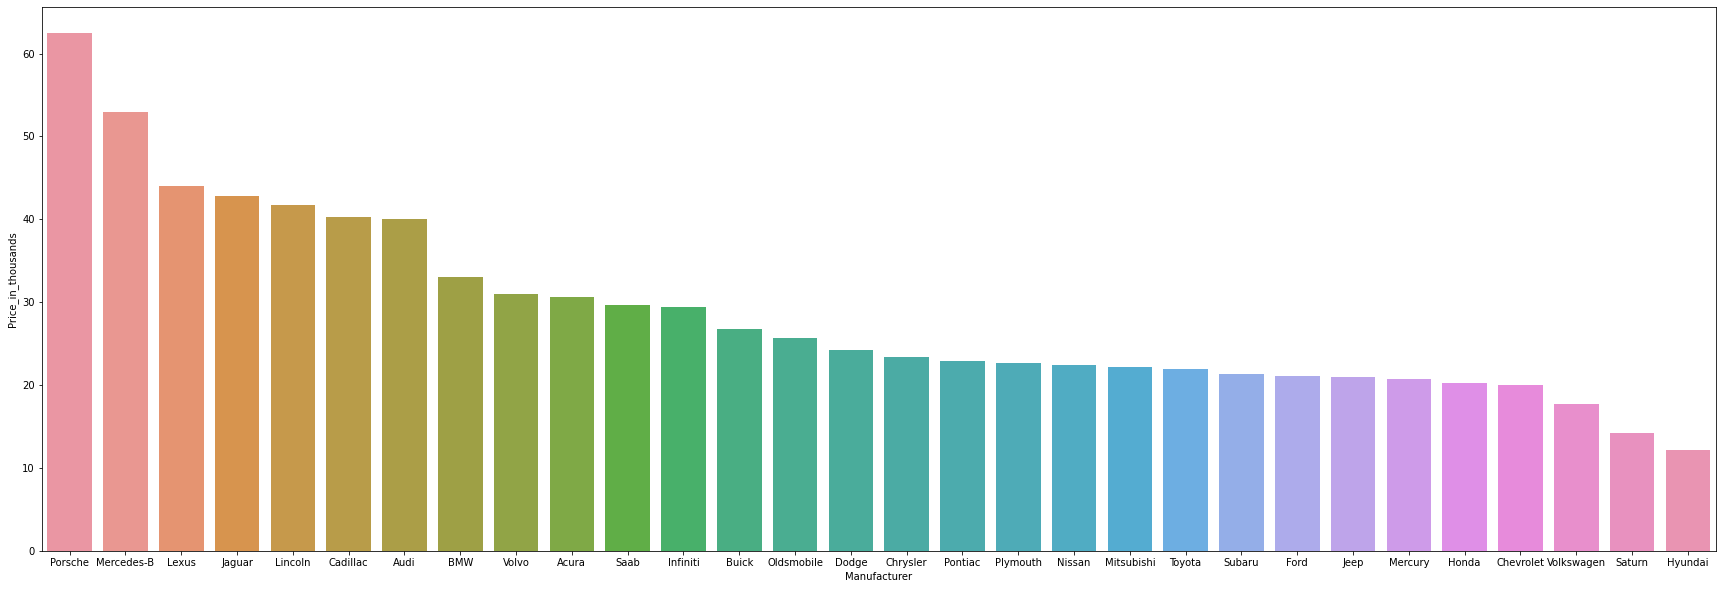

In [8]:
fig, ax = plt.subplots(figsize=(30,10))
sd.barplot( x='Manufacturer', y='Price_in_thousands', data = avg )

# Sales v.s Price Scatter Chart (Interactive)

In [9]:

fig = px.scatter(carData, x="Sales_in_thousands", y="Price_in_thousands", color="Manufacturer")
fig

# Visualization of the Prices per Model From Every Manufacturer (Interactive)

In [10]:
fig = px.bar(carData, x="Manufacturer", y="Price_in_thousands", color="Model" )
fig

# Conclusion 

The data provided shows
- 1) The most popular manufacturer
- 2) Most expensive car model 
- 3) Top 5 average prices of each manufacturer (expensive & cheapest)
- 4) Using graphs to visualize the data 

This data can help people educate car buyers on the most popular manufacturers and models, and show the cheapest and most expensive manufacturers.

The data can also help manufacturers learn from the relationship between price and sales using the interactive graphs.

